## Creating a Bayesian Network to caluclate Conditional Probabilities

In [6]:
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

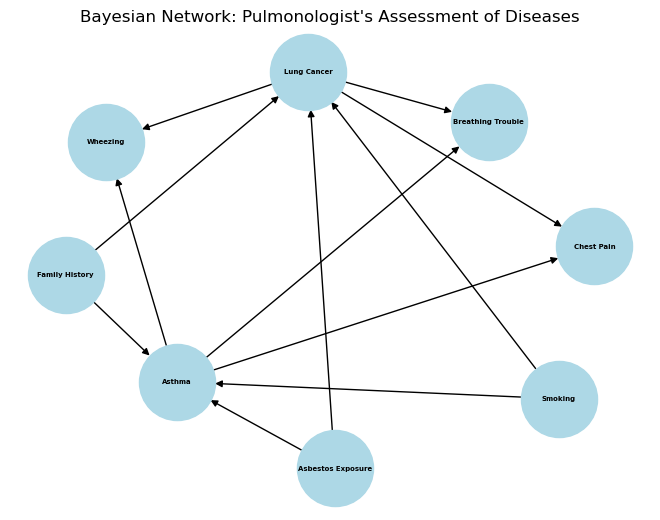

In [7]:
# Define the Bayesian Network structure
model = BayesianNetwork([('Family History', 'Asthma'),
                         ('Family History', 'Lung Cancer'),
                         ('Asbestos Exposure', 'Asthma'),
                         ('Asbestos Exposure', 'Lung Cancer'),
                         ('Smoking', 'Asthma'),
                         ('Smoking', 'Lung Cancer'),
                         ('Lung Cancer','Chest Pain'),
                         ('Lung Cancer','Wheezing'),
                         ('Lung Cancer','Breathing Trouble'),
                         ('Asthma','Chest Pain'),
                         ('Asthma','Wheezing'),
                         ('Asthma','Breathing Trouble')])


G = nx.DiGraph(model.edges())
pos = nx.spring_layout(G, k=3, seed=43)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=5, font_weight="bold", )
plt.title("Bayesian Network: Pulmonologist's Assessment of Diseases")
plt.show()

In [8]:

# A: Family History
cpd_a = TabularCPD(variable='Family History', variable_card=2, values=[[0.6], [0.4]])

# B: Asbestos Exposure
cpd_b = TabularCPD(variable='Asbestos Exposure', variable_card=4, values=[[0.1], [0.4], [0.2], [0.3]])

# C: Smoking
cpd_c = TabularCPD(variable='Smoking', variable_card=2, values=[[0.4], [0.6]])

# D: Asthma
# P(d_i | a_j, b_k, c_l)
cpd_d = TabularCPD(variable='Asthma', variable_card=2,
                   values=[
                       [0.444, 0.142, 0.583, 0.5, 0.4, 0.444, 0.495, 0.125, 0.333, 0.7, 0.583, 0.727, 0.47, 0.375, 0.6, 0.25],
                       [0.556, 0.858, 0.417, 0.5, 0.6, 0.556, 0.505, 0.875, 0.667, 0.3, 0.417, 0.273, 0.53, 0.625, 0.4, 0.75]
                   ],
                   evidence=['Family History', 'Asbestos Exposure', 'Smoking'],
                   evidence_card=[2, 4, 2])

# E: Lung Cancer
# P(e_i | a_j, b_k, c_l)
cpd_e = TabularCPD(variable='Lung Cancer', variable_card=2,
                   values=[
                       [0.142, 0.5, 0.444, 0.125, 0.7, 0.727, 0.375, 0.25, 0.714, 0.5, 0.5, 0.529, 0.2, 0.2, 0.5, 0.5],
                       [0.858, 0.5, 0.556, 0.875, 0.3, 0.273, 0.625, 0.75, 0.286, 0.5, 0.5, 0.471, 0.8, 0.8, 0.5, 0.5]
                   ],
                   evidence=['Family History', 'Asbestos Exposure', 'Smoking'],
                   evidence_card=[2, 4, 2])

# F: Wheezing
# P(f_i | d_j, e_k)
cpd_f = TabularCPD(variable='Wheezing', variable_card=4,
                   values=[
                       [0.294, 0.125, 0.454, 0.173],
                       [0.294, 0.125, 0.272, 0.217],
                       [0.117, 0.5, 0.09, 0.217],
                       [0.295, 0.25, 0.184, 0.393]
                   ],
                   evidence=['Asthma', 'Lung Cancer'],
                   evidence_card=[2, 2])

# G: Breathing Trouble
# P(g_i | d_j, e_k)
cpd_g = TabularCPD(variable='Breathing Trouble', variable_card=3,
                   values=[
                       [0.375, 0.166, 0.5, 0.125],
                       [0.25, 0.583, 0.333, 0.25],
                       [0.375, 0.251, 0.167, 0.625]
                   ],
                   evidence=['Asthma', 'Lung Cancer'],
                   evidence_card=[2, 2])

# H: Chest Pain
# P(h_i | d_j, e_k)
cpd_h = TabularCPD(variable='Chest Pain', variable_card=3,
                   values=[
                       [0.166, 0.125, 0.346, 0.4],
                       [0.583, 0.25, 0.346, 0.5],
                       [0.251, 0.625, 0.308, 0.1]
                   ],
                   evidence=['Asthma', 'Lung Cancer'],
                   evidence_card=[2, 2])


In [9]:
# Add CPDs to the model
model.add_cpds(cpd_a, cpd_b, cpd_c, cpd_d, cpd_e, cpd_f, cpd_g, cpd_h)

# Check if the model is valid
assert model.check_model(), "The model is inconsistent!"

In [10]:
# Perform inference
inference = VariableElimination(model)

# Query for P(E = e1 | C = c2, H = h2, G = g3, B = b4)
query_result = inference.query(variables=['Lung Cancer'], evidence={'Smoking': 1, 'Chest Pain': 1, 'Breathing Trouble': 2, 'Asbestos Exposure': 3})

# Output the result rounded to two decimal places
probability_e1 = query_result.values[0]  # This gives P(E = e1)
print(f"The probability of having lung cancer given the evidence is: {probability_e1:.4f}")


The probability of having lung cancer given the evidence is: 0.1505


In [11]:
query_result.values

array([0.15048611, 0.84951389])

## Creating a Bayesian Network to calculate Conditional Independence

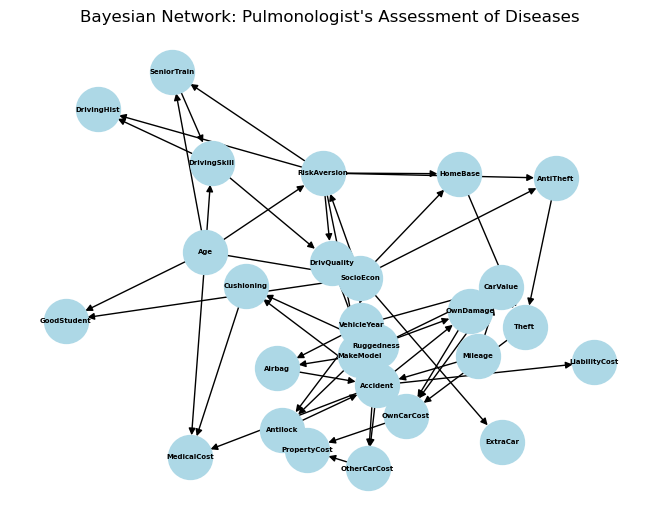

In [12]:
# Checking for d connection

# Define the Bayesian Network structure
model = BayesianNetwork([
    ('Age', 'GoodStudent'),
    ('Age', 'SocioEcon'),
    ('Age', 'RiskAversion'),
    ('Age', 'SeniorTrain'),
    ('Age', 'DrivingSkill'),
    ('Age', 'MedicalCost'),

    ('SocioEcon', 'GoodStudent'),
    ('SocioEcon', 'ExtraCar'),
    ('SocioEcon', 'RiskAversion'),
    ('SocioEcon', 'MakeModel'),
    ('SocioEcon', 'HomeBase'),
    ('SocioEcon', 'AntiTheft'),
    ('SocioEcon', 'VehicleYear'),

    ('DrivingSkill', 'DrivingHist'),
    ('DrivingSkill', 'DrivQuality'),

    ('SeniorTrain', 'DrivingSkill'),

    ('RiskAversion', 'SeniorTrain'),
    ('RiskAversion', 'DrivingHist'),
    ('RiskAversion', 'DrivQuality'),
    ('RiskAversion', 'MakeModel'),
    ('RiskAversion', 'HomeBase'),
    ('RiskAversion', 'AntiTheft'),

    ('Mileage', 'Accident'),
    ('Mileage', 'CarValue'),

    ('VehicleYear', 'Antilock'),
    ('VehicleYear', 'Ruggedness'),
    ('VehicleYear', 'Airbag'),
    ('VehicleYear', 'CarValue'),

    ('MakeModel', 'Antilock'),
    ('MakeModel', 'Airbag'),
    ('MakeModel', 'Ruggedness'),
    ('MakeModel', 'CarValue'),

    ('DrivQuality', 'Accident'),

    ('Antilock', 'Accident'),

    ('Airbag', 'Accident'),  # Corrected typo from 'Aribag' to 'Airbag'
    ('CarValue', 'Theft'),
    ('CarValue', 'OwnCarCost'),
    ('HomeBase', 'Theft'),
    ('AntiTheft', 'Theft'),
    ('Ruggedness', 'OwnDamage'),
    ('Ruggedness', 'OtherCarCost'),
    ('Ruggedness', 'Cushioning'),
    ('Accident', 'OwnDamage'),
    ('Accident', 'OtherCarCost'),
    ('Accident', 'MedicalCost'),
    ('Accident', 'LiabilityCost'),
    ('Accident', 'Cushioning'),
    ('Theft', 'OwnCarCost'),
    ('Cushioning', 'MedicalCost'),
    ('OtherCarCost', 'PropertyCost'),
    ('OwnDamage', 'OwnCarCost'),
    ('OwnCarCost', 'PropertyCost')
])



G = nx.DiGraph(model.edges())
pos = nx.spring_layout(G, k=0.5, seed=43)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=5, font_weight="bold", )
plt.title("Bayesian Network: Pulmonologist's Assessment of Diseases")
plt.show()

In [13]:
result = model.is_dconnected('Accident', 'VehicleYear', observed=['DrivQuality','Mileage','Airbag','Antilock'])
print(result)

False


In [14]:
result = model.is_dconnected('CarValue', 'OtherCarCost', observed=['VehicleYear','Mileage'])
print(result)

True


## Creating a Bayesian Network to perform Predictive Modeling

In [15]:
data = pd.read_csv("./Datasets/titanic_train.csv")  

In [16]:
# Drop rows with missing values for simplicity
data.dropna(subset=['Age', 'Fare', 'Sex', 'Pclass', 'Survived'], inplace=True)

# Bin 'Age' into categories
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

# Bin 'Fare' into categories
data['FareGroup'] = pd.qcut(data['Fare'], q=4, labels=['Low', 'Medium', 'High', 'VeryHigh'])

# Encode 'Sex' as a binary variable
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Keep only the columns we need
data = data[['Survived', 'Pclass', 'Sex', 'AgeGroup', 'FareGroup']]
print(data.head())


   Survived  Pclass  Sex    AgeGroup FareGroup
0         0       3    0  YoungAdult       Low
1         1       1    1       Adult  VeryHigh
2         1       3    1  YoungAdult       Low
3         1       1    1  YoungAdult  VeryHigh
4         0       3    0  YoungAdult       Low


In [17]:

# Define the structure of the Bayesian Network
model = BayesianNetwork([
    ('Pclass', 'Survived'),
    ('Sex', 'Survived'),
    ('AgeGroup', 'Survived'),
    ('Pclass', 'FareGroup'),
    ('AgeGroup', 'FareGroup')
])

# Fit the model parameters to the data using Maximum Likelihood Estimation
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Display the learned CPDs (Conditional Probability Distributions)
for cpd in model.get_cpds():
    print(cpd)


+-----------+----------+
| Pclass(1) | 0.260504 |
+-----------+----------+
| Pclass(2) | 0.242297 |
+-----------+----------+
| Pclass(3) | 0.497199 |
+-----------+----------+
+-------------+---------------------+-----+----------------------+
| AgeGroup    | AgeGroup(Adult)     | ... | AgeGroup(YoungAdult) |
+-------------+---------------------+-----+----------------------+
| Pclass      | Pclass(1)           | ... | Pclass(3)            |
+-------------+---------------------+-----+----------------------+
| Sex         | Sex(0)              | ... | Sex(1)               |
+-------------+---------------------+-----+----------------------+
| Survived(0) | 0.6296296296296297  | ... | 0.5                  |
+-------------+---------------------+-----+----------------------+
| Survived(1) | 0.37037037037037035 | ... | 0.5                  |
+-------------+---------------------+-----+----------------------+
+--------+----------+
| Sex(0) | 0.634454 |
+--------+----------+
| Sex(1) | 0.365546 |


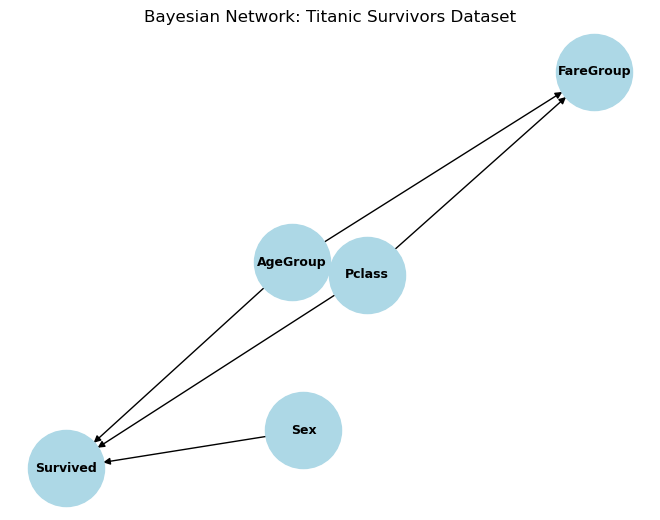

In [20]:
G = nx.DiGraph(model.edges())
pos = nx.spring_layout(G, k=0.5, seed=43)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=9, font_weight="bold", )
plt.title("Bayesian Network: Titanic Survivors Dataset")
plt.show()

In [21]:
from pgmpy.inference import VariableElimination

# use variable elimination for inference
inference = VariableElimination(model)


# Define the evidence
evidence = {'Pclass': 3, 'Sex': 1, 'AgeGroup': 'YoungAdult'}

# Query the probability of survival given the evidence
query_result = inference.query(variables=['Survived'], evidence=evidence)
print(query_result)


+-------------+-----------------+
| Survived    |   phi(Survived) |
+=============+=================+
| Survived(0) |          0.5000 |
+-------------+-----------------+
| Survived(1) |          0.5000 |
+-------------+-----------------+
